## Dataset Information

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


Variable | Description
----------|--------------
Item_Identifier | Unique product ID
Item_Weight | Weight of product
Item_Fat_Content | Whether the product is low fat or not
Item_Visibility | The % of total display area of all products in a    store allocated to the particular product
Item_Type | The category to which the product belongs
Item_MRP | Maximum Retail Price (list price) of the product
Outlet_Identifier | Unique store ID
Outlet_Establishment_Year | The year in which store was established
Outlet_Size | The size of the store in terms of ground area covered
Outlet_Location_Type | The type of city in which the store is located
Outlet_Type | Whether the outlet is just a grocery store or some sort of supermarket
Item_Outlet_Sales | Sales of the product in the particulat store. This is the outcome variable to be predicted.

### Importing modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
#Loading the dataset
df = pd.read_csv('Bigmart.csv')
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# statistical info
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

## Preprocessing the dataset


Preprocessing data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps: 

1.Remove duplicate rows 

2.Handling missing values.

3.Convert columns to appropriate datatypes.

4.Adding important columns

5.Remove outliers

#### Removing duplicate columns 

In [6]:
df[df.duplicated()].shape

(0, 12)

There are no duplicate rows in the dataset

#### Handling missing values

In [7]:
# check for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The dataset contains two columns i.e Item_weight and Outlet_size which have null values in it. 

In [8]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [11]:
#filling the missing values
item_weight_mean= df.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [12]:
miss_bool = df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [13]:
#Filling the missing values with the mean of item weight
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [14]:
df['Item_Weight'].isnull().sum()

0

There are no null values in the Item weight column

In [15]:
#finding the mode of Outsize of different Outlet types
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [16]:
#Filling the missing values with the mode value
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [17]:
df['Outlet_Size'].isnull().sum()

0

There are no null values in the Outlet size column

In [18]:
sum(df['Item_Visibility']==0)

526

In [19]:
# replace zeros with mean
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [20]:
sum(df['Item_Visibility']==0)

0

In [21]:
# combine item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Creating new Attributes

In [22]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [23]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [24]:
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [25]:
# create small values for establishment year
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

In [26]:
df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [27]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


## Exploratory Data Analysis

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

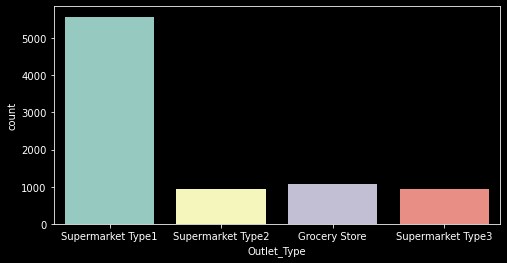

In [28]:
plt.style.use('dark_background')
plt.figure(figsize=(8,4))
sns.countplot(df['Outlet_Type'])

The most number of sales are done in the supermarket type1

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

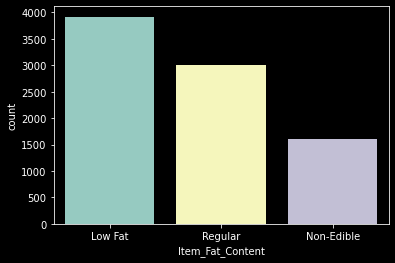

In [29]:
sns.countplot(df["Item_Fat_Content"])

The most people are preferring the food which has the low fat content

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

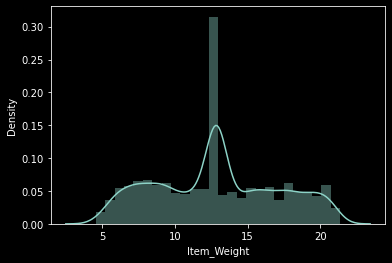

In [30]:
sns.distplot(df['Item_Weight'])

The most sales of the product having the weight of average 12

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

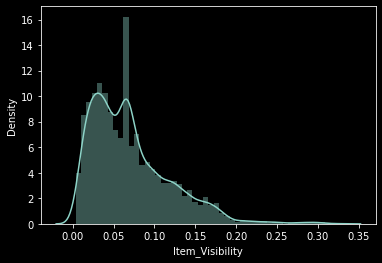

In [31]:
sns.distplot(df['Item_Visibility'])

Mostly the products are sold by 10 percent of total visible time of all products

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

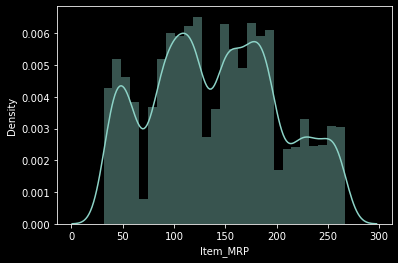

In [32]:
sns.distplot(df['Item_MRP'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

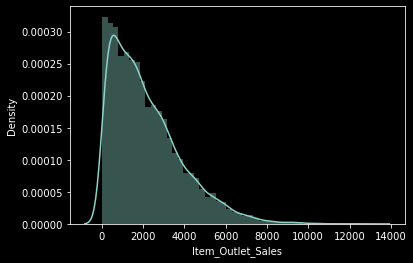

In [33]:
sns.distplot(df['Item_Outlet_Sales'])

In [34]:
# log transformation
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

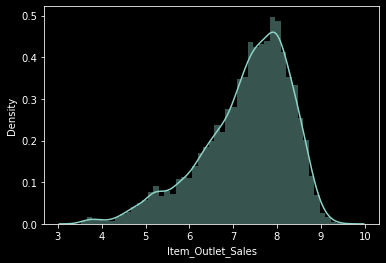

In [35]:
sns.distplot(df['Item_Outlet_Sales'])

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

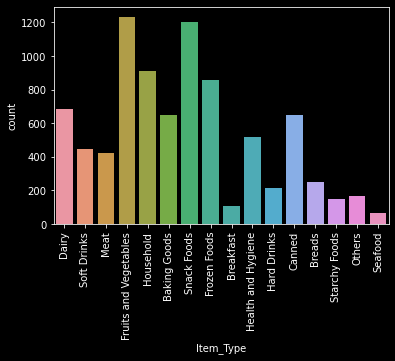

In [36]:
#plt.figure(figsize=(26,5))
l = list(df['Item_Type'].unique())
chart = sns.countplot(df["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)

The demanding products for the sales are fruits,vegetables and snack foods 

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

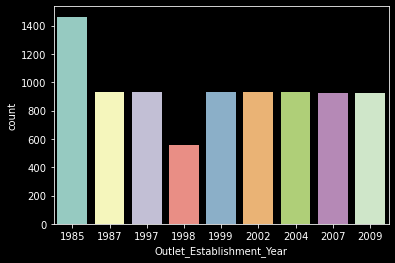

In [37]:
sns.countplot(df['Outlet_Establishment_Year'])

The sales are mostly not depending on the establish year  

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

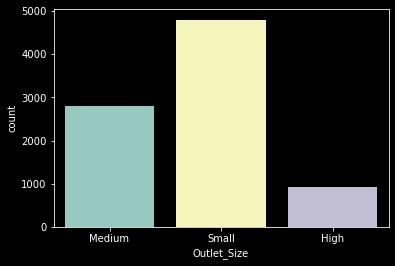

In [38]:
sns.countplot(df['Outlet_Size'])

The most sales are done for the outlet size of small

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

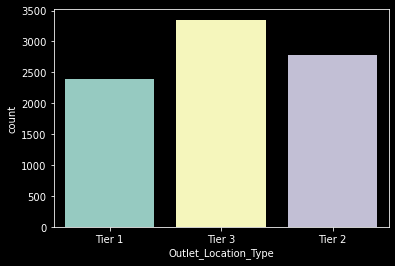

In [39]:
sns.countplot(df['Outlet_Location_Type'])

The most sales are done in the location of tier3

Text(0.5, 1.0, 'Outlet Sales vs MRP')

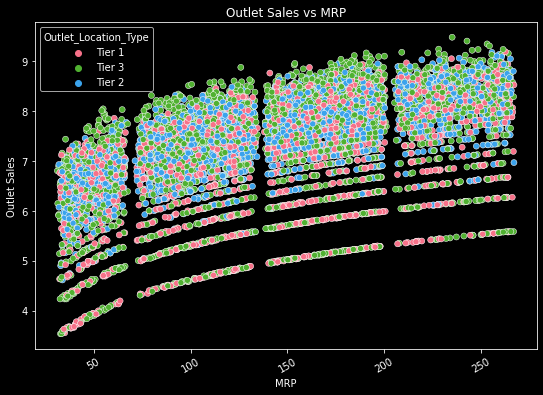

In [40]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales',hue = 'Outlet_Location_Type', palette='husl',data=df)
plt.ylabel("Outlet Sales")
plt.xlabel("MRP")
p = plt.xticks(rotation=30)
plt.title("Outlet Sales vs MRP")

The most number of sales for different MRP are done from location of Tier3

### Correlation Matrix

<AxesSubplot:>

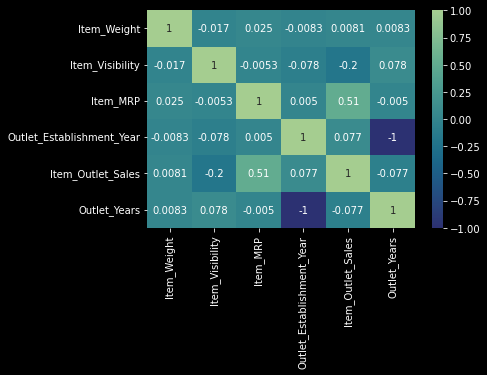

In [41]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='crest_r')

The Item Outlet sales are highly correlated with MRP of the product

In [42]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,26


### Handling the Categorical Columns 

The Categorical Columns data cannot be used for the statistical analysis.So those columns are converted into numerical data i.e numbering them based on the Labels

### Binary Encoding

In [45]:
import category_encoders as ce
be = ce.BinaryEncoder(cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'],return_df = True)
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
df = be.fit_transform(df)

In [46]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content_0,Item_Fat_Content_1,Item_Visibility,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,...,Outlet_Size_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Item_Outlet_Sales,New_Item_Type_0,New_Item_Type_1,Outlet_Years
0,FDA15,9.30,0,1,0.016047,0,0,0,0,1,...,1,0,1,0,0,1,8.225808,0,1,14
1,DRC01,5.92,1,0,0.019278,0,0,0,1,0,...,1,1,0,0,1,0,6.096776,1,0,4
2,FDN15,17.50,0,1,0.016760,0,0,0,1,1,...,1,0,1,0,0,1,7.648868,0,1,14
3,FDX07,19.20,1,0,0.066132,0,0,1,0,0,...,0,1,0,0,1,1,6.597664,0,1,15
4,NCD19,8.93,1,1,0.066132,0,0,1,0,1,...,1,1,0,0,0,1,6.903451,1,1,26


###  Spliting the dataset

In [47]:
X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

### Model Selection

Model Selection is the step in which we find the model which suits the best based on the mean square error of the model

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#### Linear Regression

In [50]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_preds)
print("Linear Regression MSE:", lr_mse)
scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_score = np.abs(np.mean(scores))
print("Linear Regression CV_Score:",cv_score)

Linear Regression MSE: 0.2842034413571697
Linear Regression CV_Score: 0.2906094806681898


#### Decision Tree

In [51]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_preds)
print("Decision Tree MSE:", dt_mse)
scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_score = np.abs(np.mean(scores))
print("Decision Tree CV_Score:",cv_score)

Decision Tree MSE: 0.5595949117507872
Decision Tree CV_Score: 0.581571484460563


#### Ridge

In [52]:
rid_model = Ridge(normalize=True)
rid_model.fit(X_train, y_train)
rid_preds = rid_model.predict(X_test)
rid_mse = mean_squared_error(y_test, rid_preds)
print("Ridge MSE:", rid_mse)
scores = cross_val_score(rid_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_score = np.abs(np.mean(scores))
print("Ridge CV_Score:",cv_score)

Ridge MSE: 0.5077806729117006
Ridge CV_Score: 0.4969205741573178


#### Lasso

In [53]:
lasso_model = Lasso()
lasso_model.fit(X_train,y_train)
lasso_preds = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test,lasso_preds)
print("Lasso MSE:", lasso_mse)
scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_score = np.abs(np.mean(scores))
print("Lasso CV_Score:",cv_score)

Lasso MSE: 0.7802512392720906
Lasso CV_Score: 0.75891554586598


#### Random Forest 

In [54]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_preds)
print("Random Forest MSE:", rf_mse)
scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_score = np.abs(np.mean(scores))
print("Random Forest CV_Score:",cv_score)

Random Forest MSE: 0.30139690881830145
Random Forest CV_Score: 0.3113100256790576


In [55]:
lr_model.score(X_train,y_train)

0.7177127708494642

In [56]:
rf_model.score(X_train,y_train)

0.9580788953176858

In [57]:
rf_model.score(X_test,y_test)

0.7133222979884478

In [58]:
lr_model.score(X_test,y_test)

0.7296760945840828

The model has the score of 72 percent using the random forest. we will find the best parameters to evaluate which will increase the score of the model

### Hyperparameter Tuning

The Hyperparameter Tuning will find the best parameters which increases the score of the model

In [59]:
# Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV


## Number of trees in ramdom forest
n_estimators = [int(x) for x in np.linspace(start=50, stop=1000, num=20)]
## Number of features to consider at every split
max_features = ['auto', 'sqrt']
## Maximum number of level in tree
max_depth = [int(x) for x in np.linspace(5,20, num=16)]
## Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
## Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [60]:
## create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [61]:
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=random_grid, scoring='neg_mean_squared_error',
                               n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [62]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=550; total time=   7.5s
[CV] END max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=550; total time=   8.0s
[CV] END max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=550; total time=   7.4s
[CV] END max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=550; total time=   8.7s
[CV] END max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=550; total time=   8.3s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=50; total time=   0.4s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=50; total time=   0.4s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      19, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500, 550, 600, 650,
                                                         700, 750, 800, 850,
                                                         900, 950, 1000]},
                   random_st

In [63]:
rf_random.best_params_

{'n_estimators': 50,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 6}

These are the best parameters for the evaluation

In [64]:
y_pred = rf_random.predict(X_test)

In [65]:
from sklearn import metrics

metrics.r2_score(y_test, y_pred)

0.7441633253431879

The model score is 74 percent